<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Code_Study/ESAA_HW0315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

추후 한글 폰트 깨짐 현상으로 인해 해결방안으로 코드 작성.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#출처: https://giveme-happyending.tistory.com/192 [소연의_개발일지:티스토리]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
#출처: https://giveme-happyending.tistory.com/192 [소연의_개발일지:티스토리]

# Matplotlib - 기본 그래프 도구

## 📌 1-1. 선 그래프

In [ ]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# -*- coding: utf-8 -*-

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel(path+'시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

In [ ]:
#누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

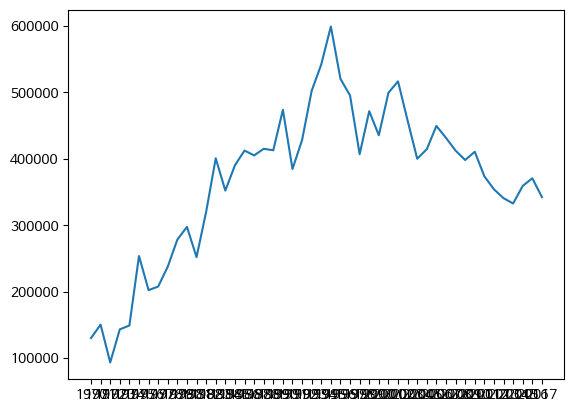

In [ ]:
#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

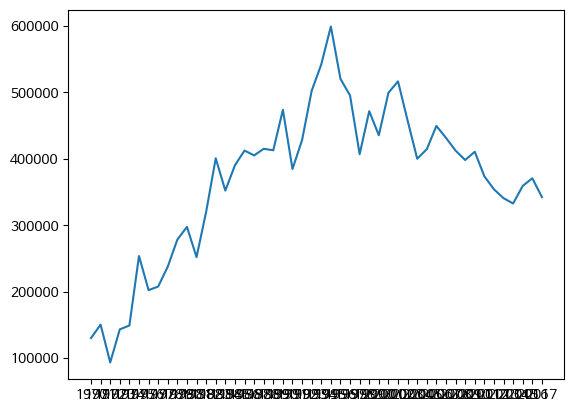

In [ ]:
#판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

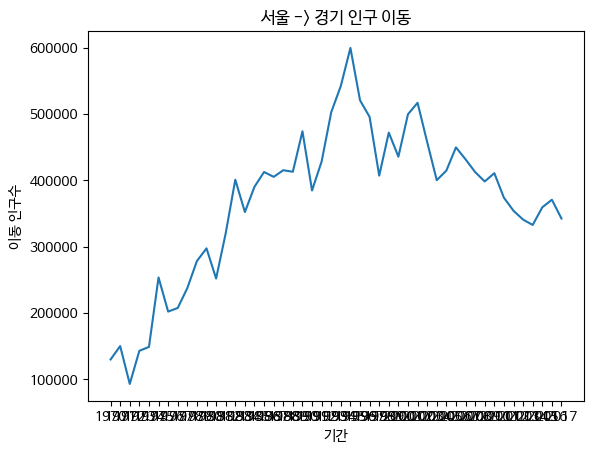

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  #변경사항 저장하고 그래프 출력

In [ ]:
#오류난다길래 주석 처리
##matplotlib 한글 폰트 오류 문제 해결
#from matplotlib import font_manager, rc
#font_path = path + 'malgun.ttf' #폰트 파일 위치
#font_name = font_manager.FontProperties(fname = font_path).get_name()
#rc('font', family = font_name)

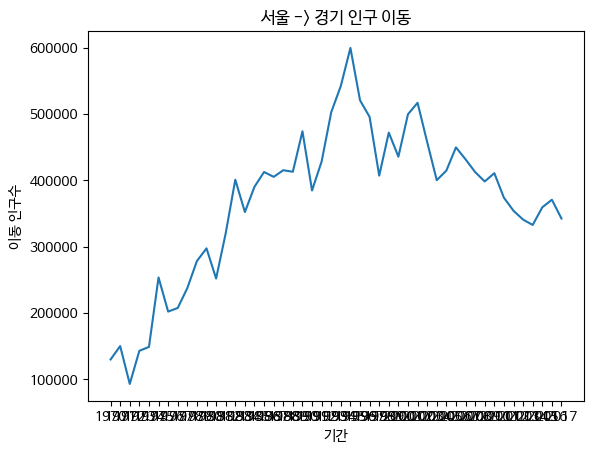

In [ ]:
# -*- coding: utf-8 -*-

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#오류난다길래 주석 처리
##matplotlib 한글 폰트 오류 문제 해결
#from matplotlib import font_manager, rc
#font_path = path + 'malgun.ttf' #폰트 파일 위치
#font_name = font_manager.FontProperties(fname = font_path).get_name()
#rc('font', family = font_name)

#Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel(path+'시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

#전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  #변경사항 저장하고 그래프 출력

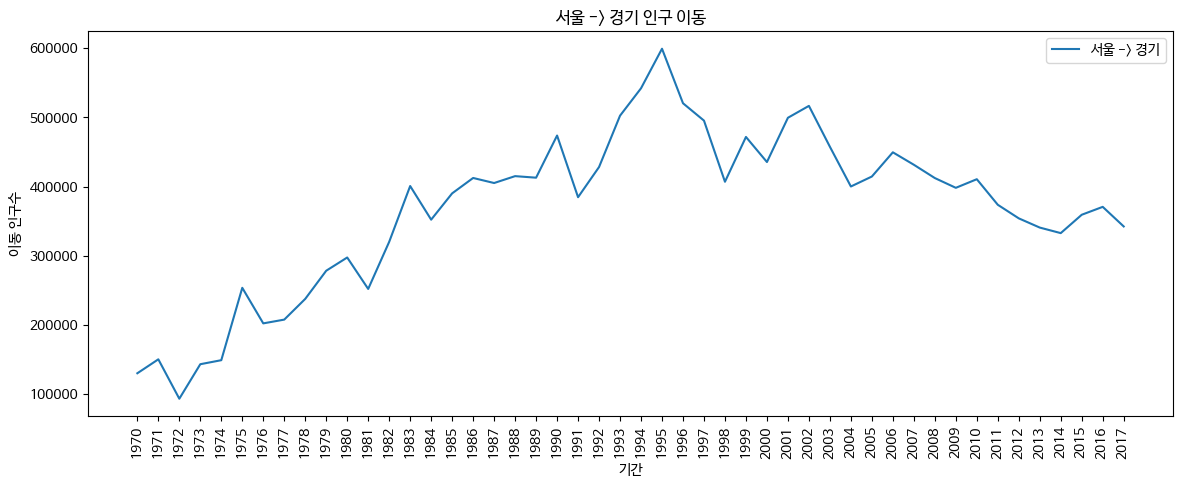

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

#x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')  #x축 이름
plt.ylabel('이동 인구수')  #y축 이름

plt.legend(labels = ['서울 -> 경기'], loc='best')  #범례 표시

plt.show()  #변경사항 저장하고 그래프 출력

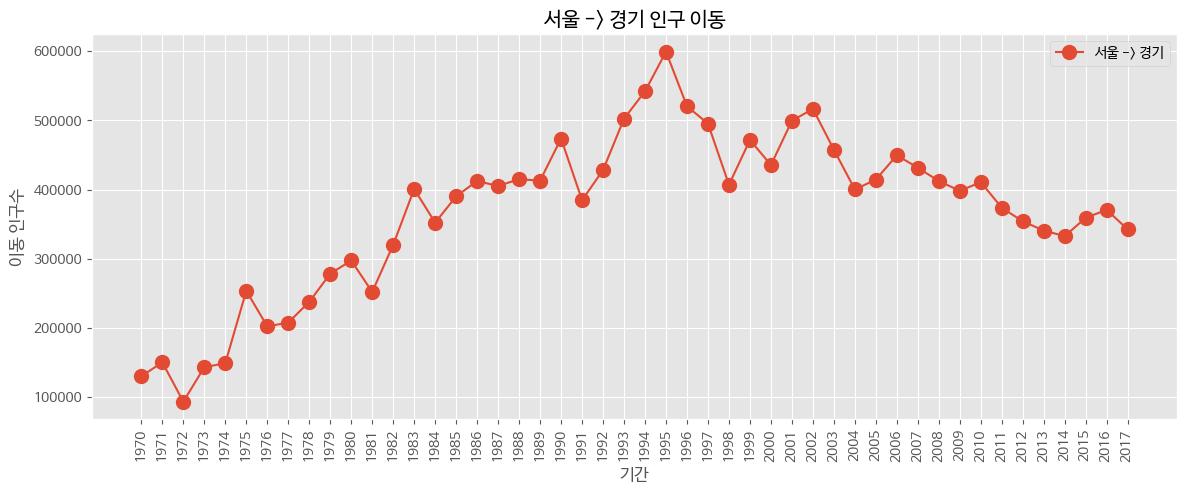

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#스타일 서식 지정
plt.style.use('ggplot')

#그림 사이즈 지정
plt.figure(figsize=(14, 5))

#x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) #마커 표시 추가

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')  #x축 이름
plt.ylabel('이동 인구수')  #y축 이름

plt.legend(labels = ['서울 -> 경기'], loc='best')  #범례 표시

plt.show()  #변경사항 저장하고 그래프 출력

In [ ]:
# -*- coding: utf-8 -*-

#라이브러리 불러오기
import matplotlib.pyplot as plt

#스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


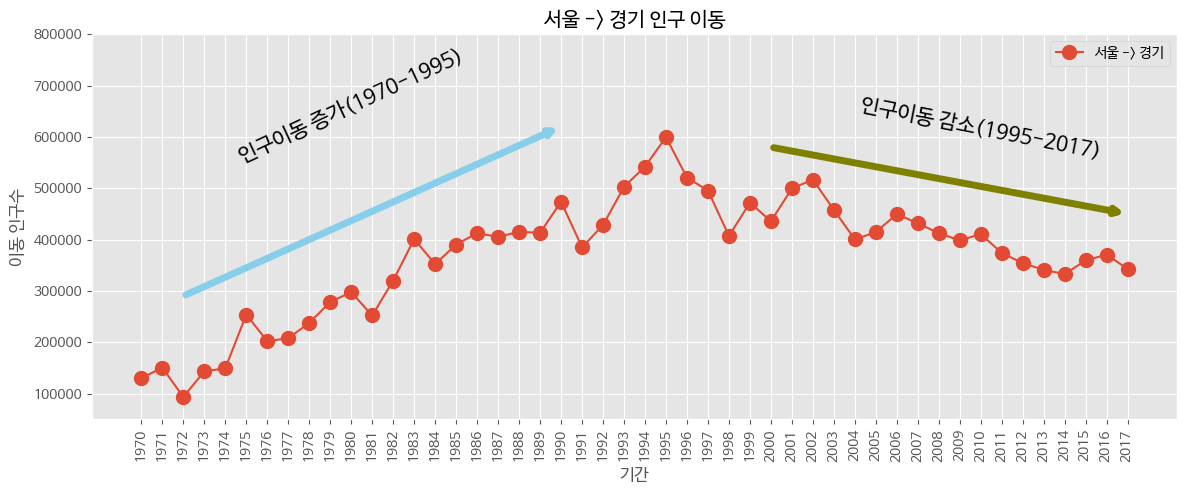

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#스타일 서식 지정
plt.style.use('ggplot')

#그림 사이즈 지정
plt.figure(figsize=(14, 5))

#x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) #마커 표시 추가

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')  #x축 이름
plt.ylabel('이동 인구수')  #y축 이름

plt.legend(labels = ['서울 -> 경기'], loc='best')  #범례 표시


#y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

#주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),   #화살표의 머리 부분(끝점)
             xytext=(2, 290000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',   #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),   #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),   #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',   #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),   #화살표 서식
             )

#주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',   #텍스트 입력
             xy=(10, 550000),   #텍스트 위치 기준점
             rotation=25,   #텍스트 회전각도
             va='baseline',   #텍스트 상하 정렬
             ha='center',   #텍스트 좌우 정렬
             fontsize=15,   #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',   #텍스트 입력
             xy=(40, 560000),   #텍스트 위치 기준점
             rotation=-11,   #텍스트 회전각도
             va='baseline',   #텍스트 상하 정렬
             ha='center',   #텍스트 좌우 정렬
             fontsize=15,   #텍스트 크기
             )

plt.show()  #변경사항 저장하고 그래프 출력

<ipython-input-23-91d96a156750>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
<ipython-input-23-91d96a156750>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


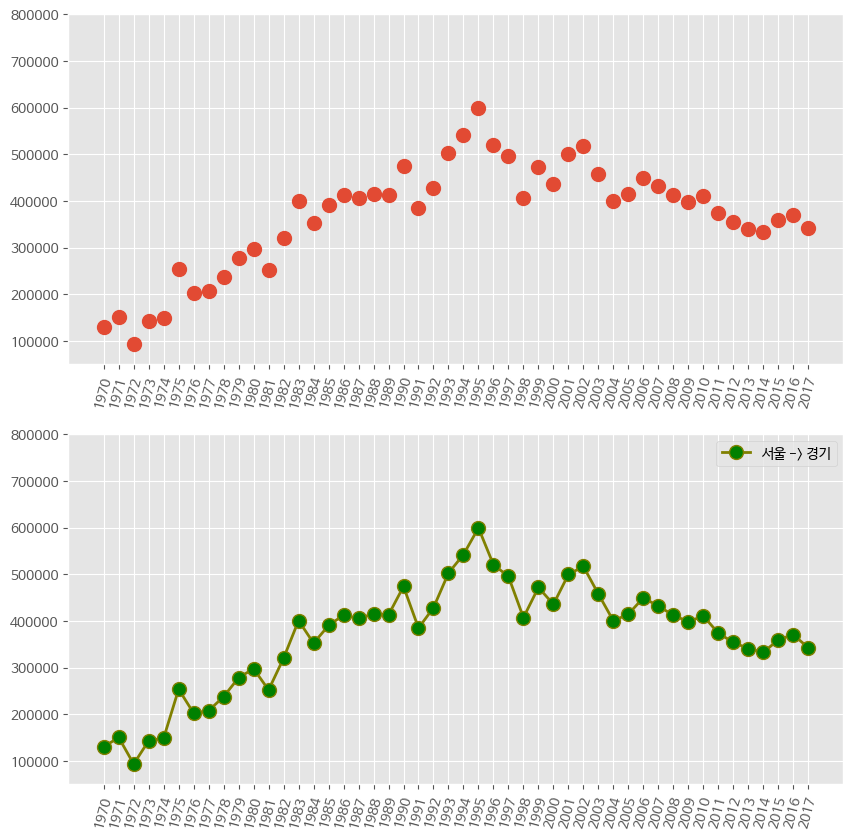

In [ ]:
#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#ax 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax2.legend(loc = 'best')

#y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

#축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show() #변경사항 저장하고 그래프 출력

<ipython-input-25-069175f8894e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation = 75)


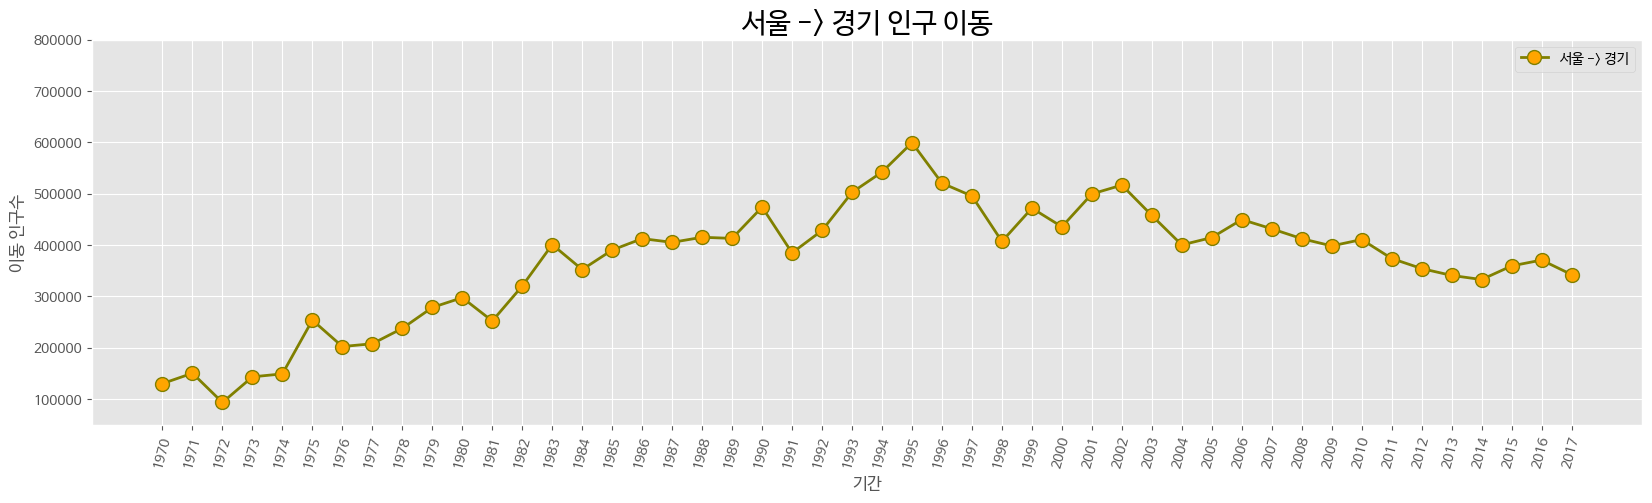

In [ ]:
#그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

#y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000)

#차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size = 20)

#축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation = 75)

plt.show() #변경사항 저장하고 그래프 출력

<ipython-input-26-8f6b1bc824ca>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


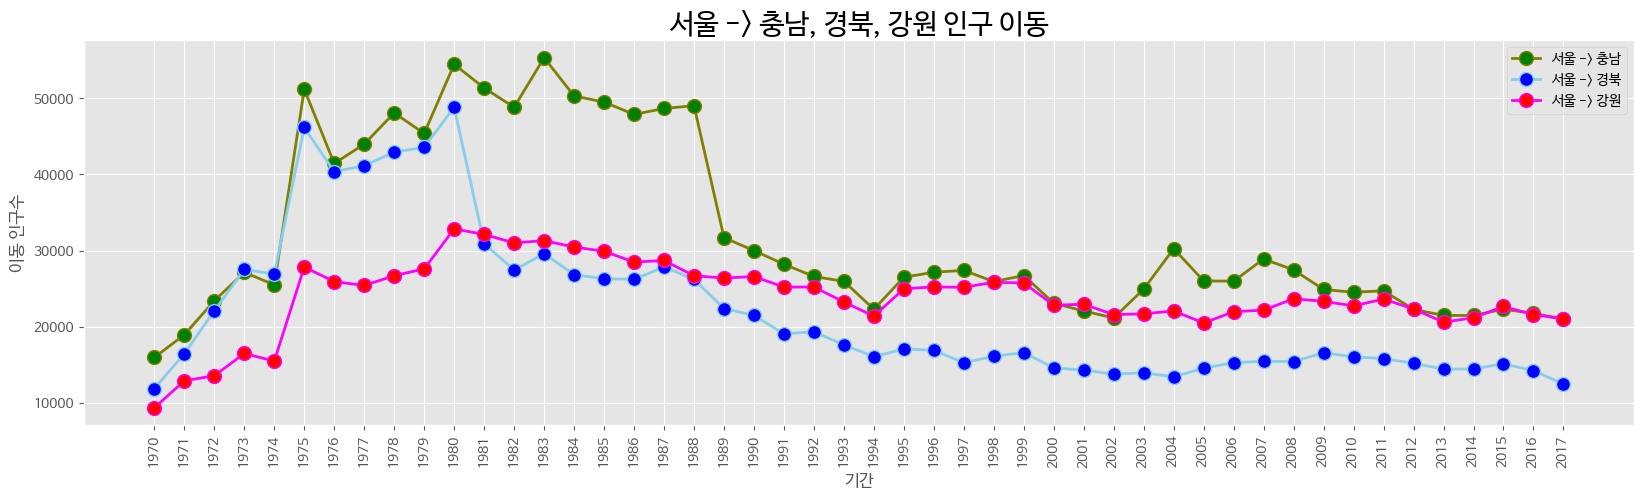

In [ ]:
#서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

#범례 표시
ax.legend(loc = 'best')

#차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

#축이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

#축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 90)

#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show() #변경사항 저장하고 그래프 출력

<ipython-input-27-5c305ad46eea>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-27-5c305ad46eea>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-27-5c305ad46eea>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-27-5c305ad46eea>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


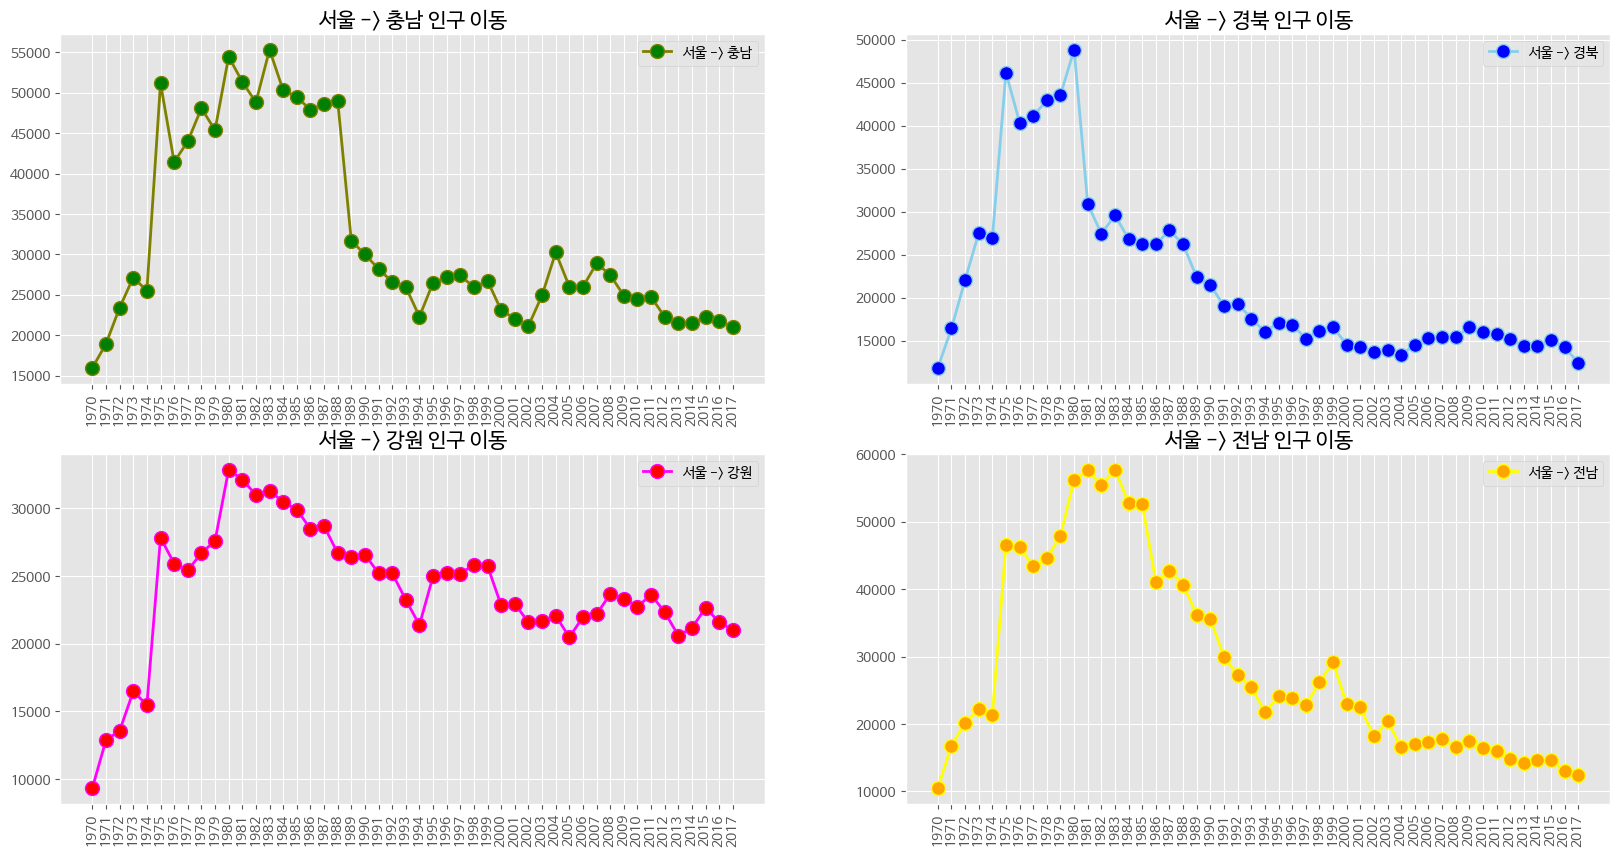

In [ ]:
#서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성(figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize=10, color = 'olive', linewidth=2, label = '서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker = 'o', markerfacecolor = 'blue',
        markersize=10, color = 'skyblue', linewidth=2, label = '서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
        markersize=10, color = 'magenta', linewidth=2, label = '서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker = 'o', markerfacecolor = 'orange',
        markersize=10, color = 'yellow', linewidth=2, label = '서울 -> 전남')

#범례 표시
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

#차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

#축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() #변경사항 저장하고 그래프 출력

In [ ]:
#라이브러리 불러오기
import matplotlib

#컬러 정보를 담을 빈 딕셔너리 생성
colors = {}

#컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex

#딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

Matplotlib -> 파이썬 표준 시각화 도구, 다양한 2차원 평면 그래프 기능 제공

선 그래프: 연속하는 데이터 값들을 직선/곡선으로 연결하여 데이터 값 사이의 관계를 나타냄.  
ex) 시계열 데이터, 연속적 값의 변화와 패턴 파악

df.fillna() -> 결측값을 입력받은 값으로 채움,
 - method = 'ffill' -> 바로 앞의 행에 위치한 데이터의 값으로 결측값을 채움.

plot(df) -> 그냥 플롯에 데이터프레임을 입력해도 기본적으로 선 그래프를 그려준다.  
plot(x, y) -> x축, y축 데이터 입력으로 선 그래프 생성  
[차트 제목, 축 이름 추가]
- plt.title('제목') -> 제목 추가
- plt.xlabel('x') -> x축 이름 추가
- plt.ylabel('y') -> y축 이름 추가

[그래프 꾸미기]
- plt.figure(figsize = (a, b)) -> 그래프 크기 지정
- plt.xticks()
 - rotation = a -> x축의 눈금 글씨를 반시계방향으로 a도 만큼 회전
 - rotation = 'vertical' -> 90도 회전  
 - size -> 폰트 크기 지정
 - marker -> 점 모양 지정
 - markersize -> 마커 사이즈 지정

- annotate()
 - va -> 글자의 방향 정렬(세로)
 - ha -> 글자의 방향 정렬(가로)
- axe 객체
 - 분할된 화면으로 그래프 표현 가능
 - add_subplot(행, 열, 서브플롯을 넣을 위치) -> ax를 특정 위치의 분할표에 넣기 가

## 📌 1-2. 면적 그래프

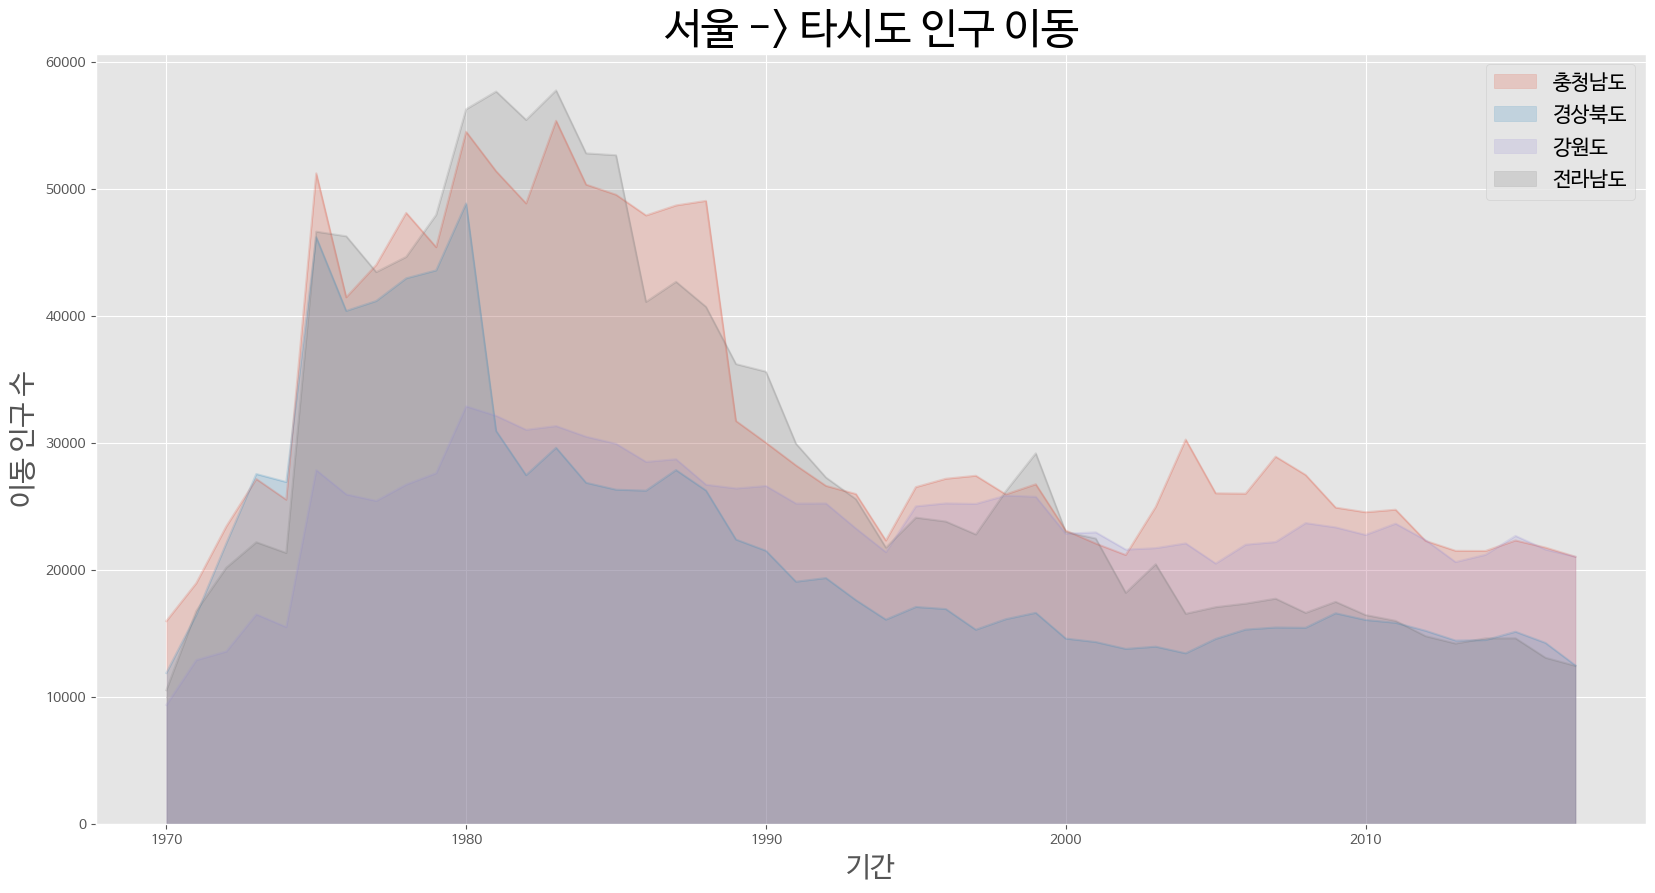

In [ ]:
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

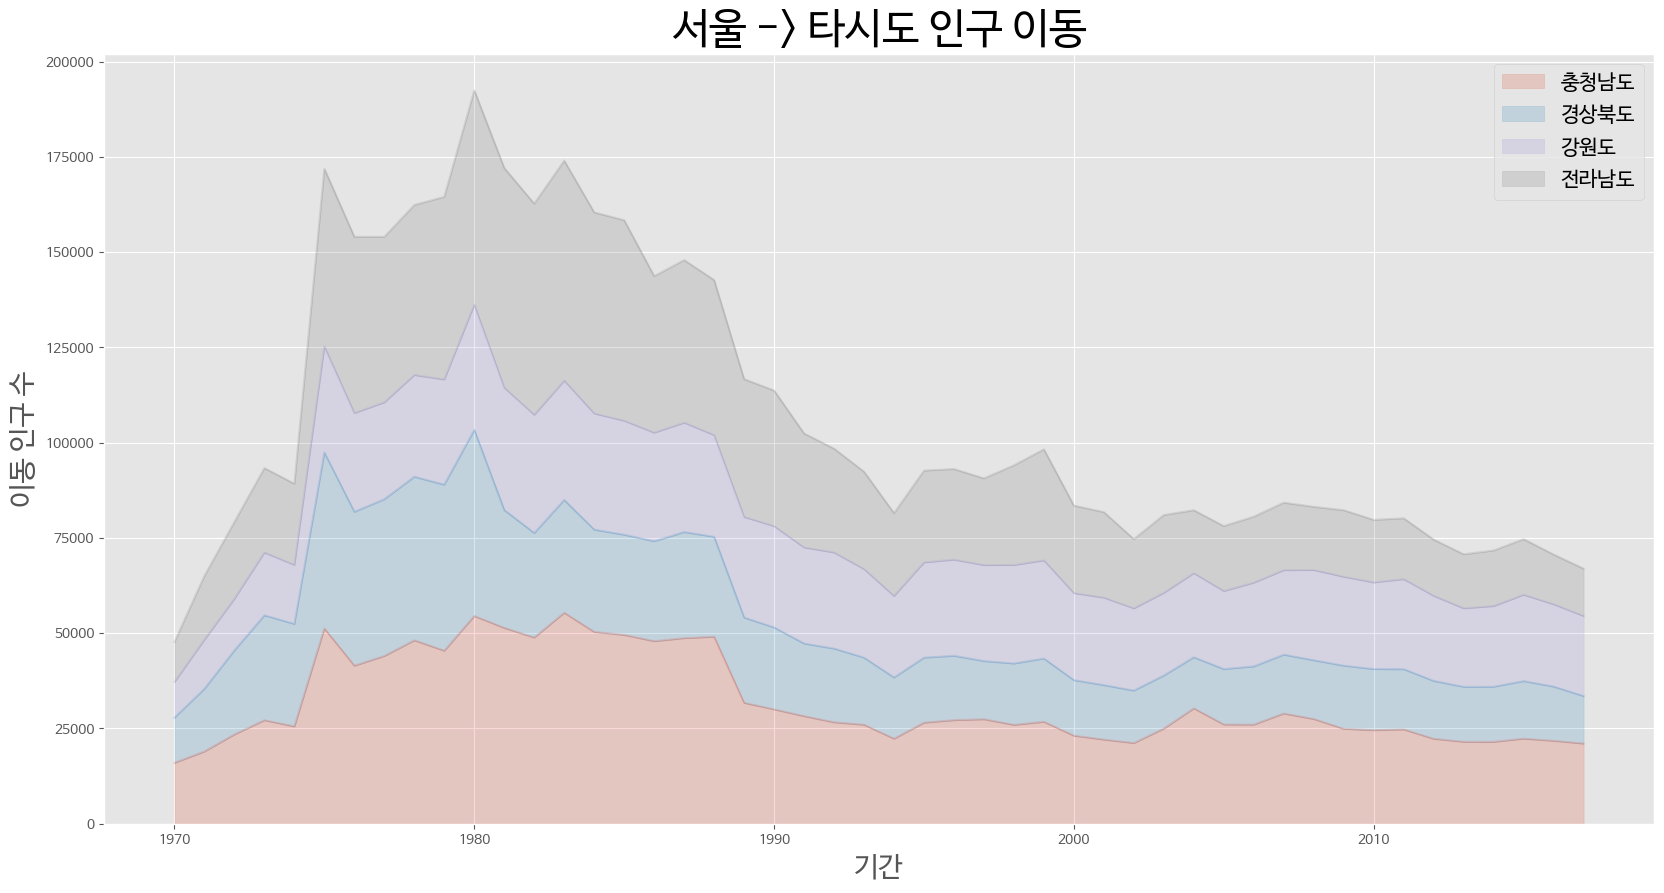

In [ ]:
#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

<class 'matplotlib.axes._axes.Axes'>


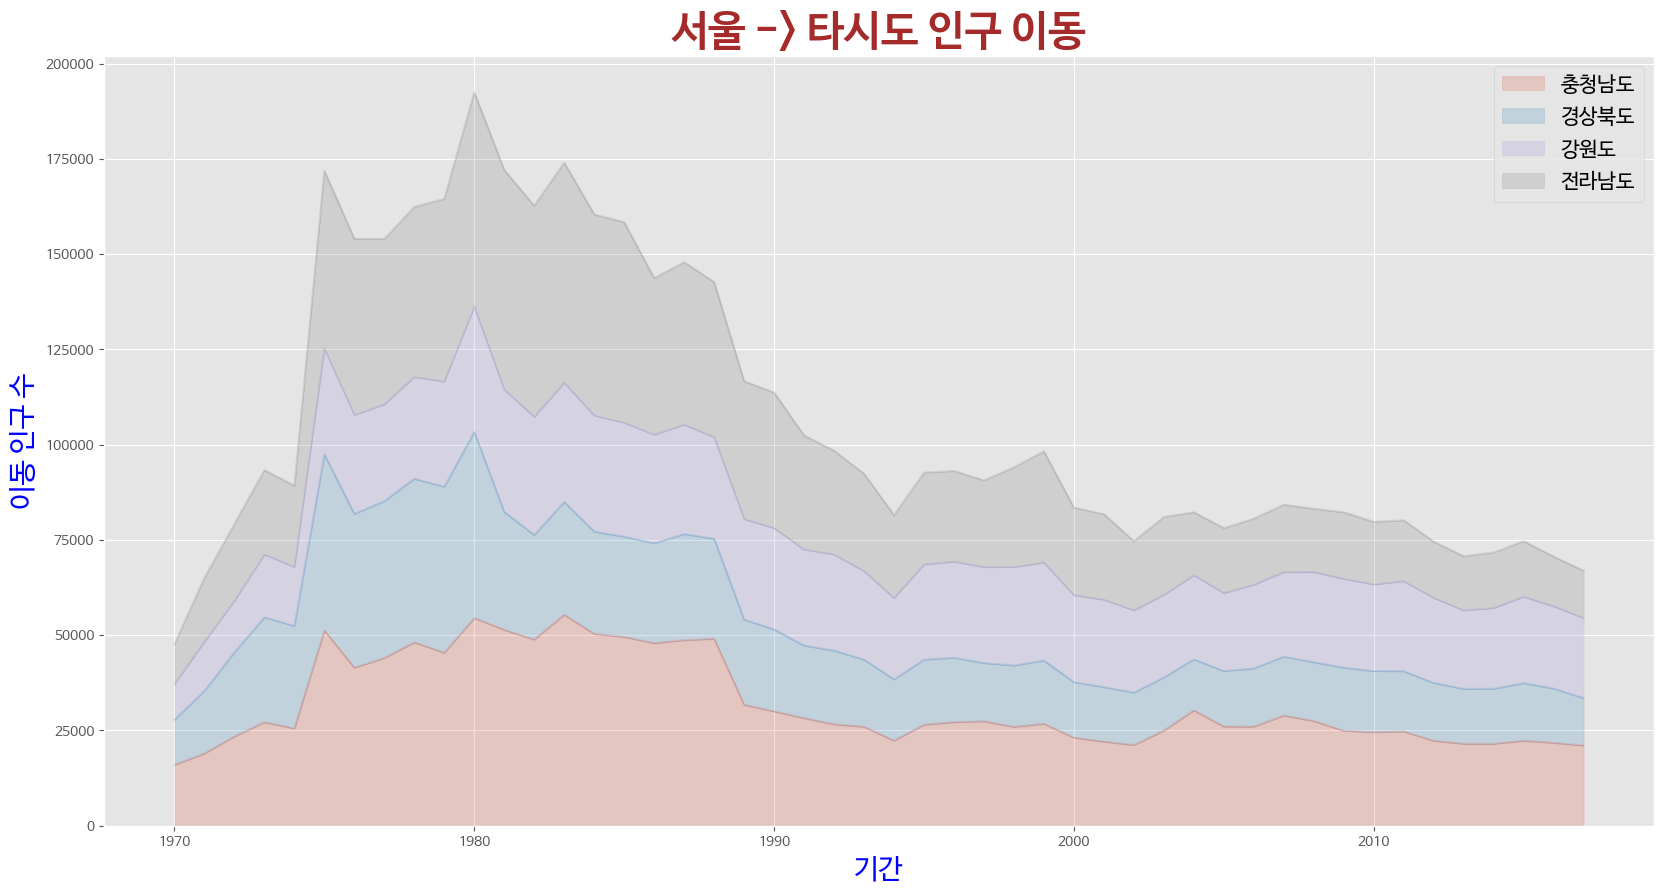

In [ ]:
#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 axe 객체 생성
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
print(type(ax))

#axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구 수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)

plt.show()

plot에 kind = 'area' 추가로 그리기 가능.
 - alpha = a -> a만큼의 투명도로 면적 그래프 생성 (a는 1이하)
 - stacked = True -> 각 열의 선 그래프를 누적하여 위로 그리는 방식. False면 겹쳐지게 그려짐.

## 📌 1-3. 막대 그래프

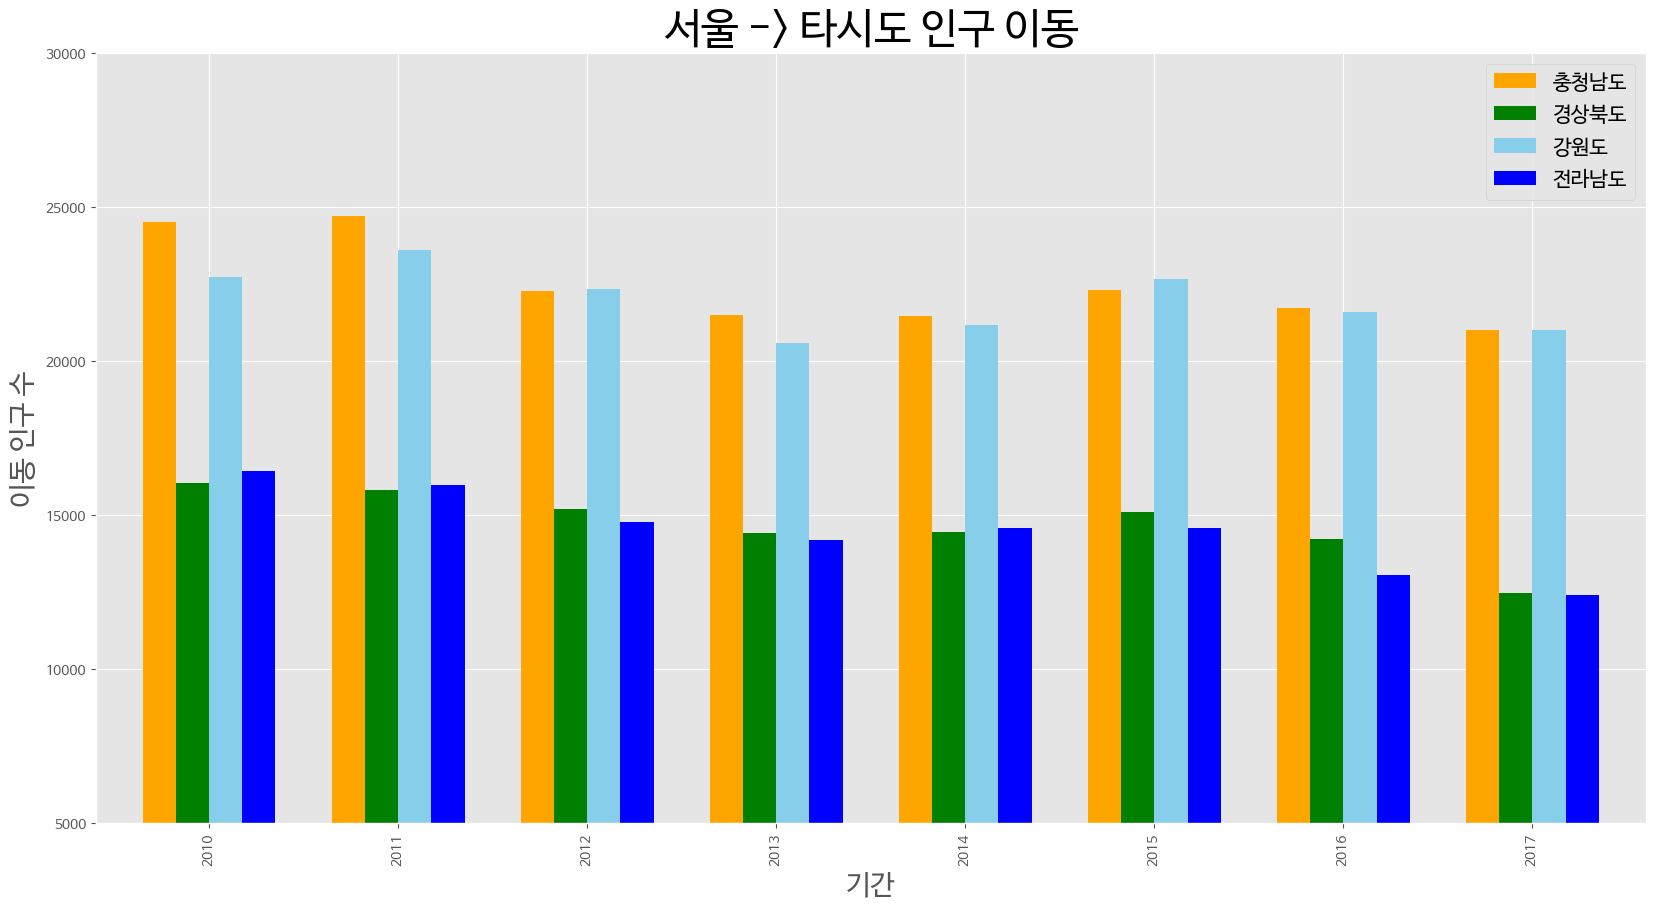

In [ ]:
#서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

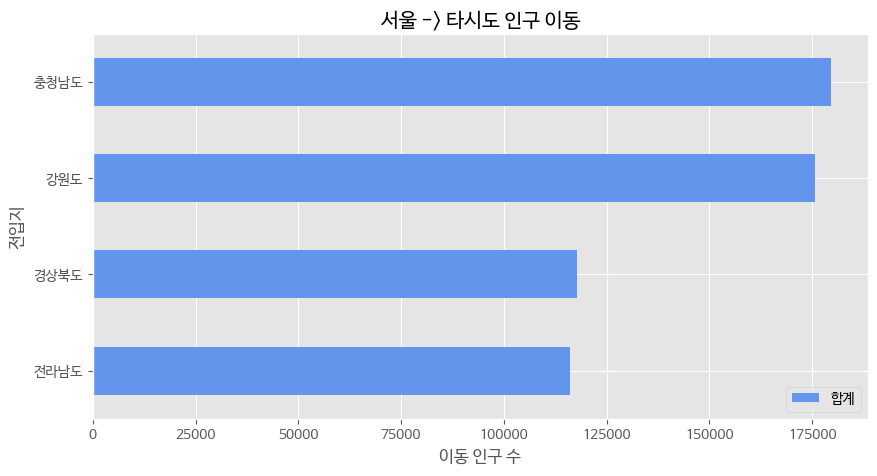

In [ ]:
#서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

#2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

#가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

#스타일 서식 지정
plt.style.use('ggplot')

#수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

<ipython-input-57-e6fa244832bd>:15: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel(path + '남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


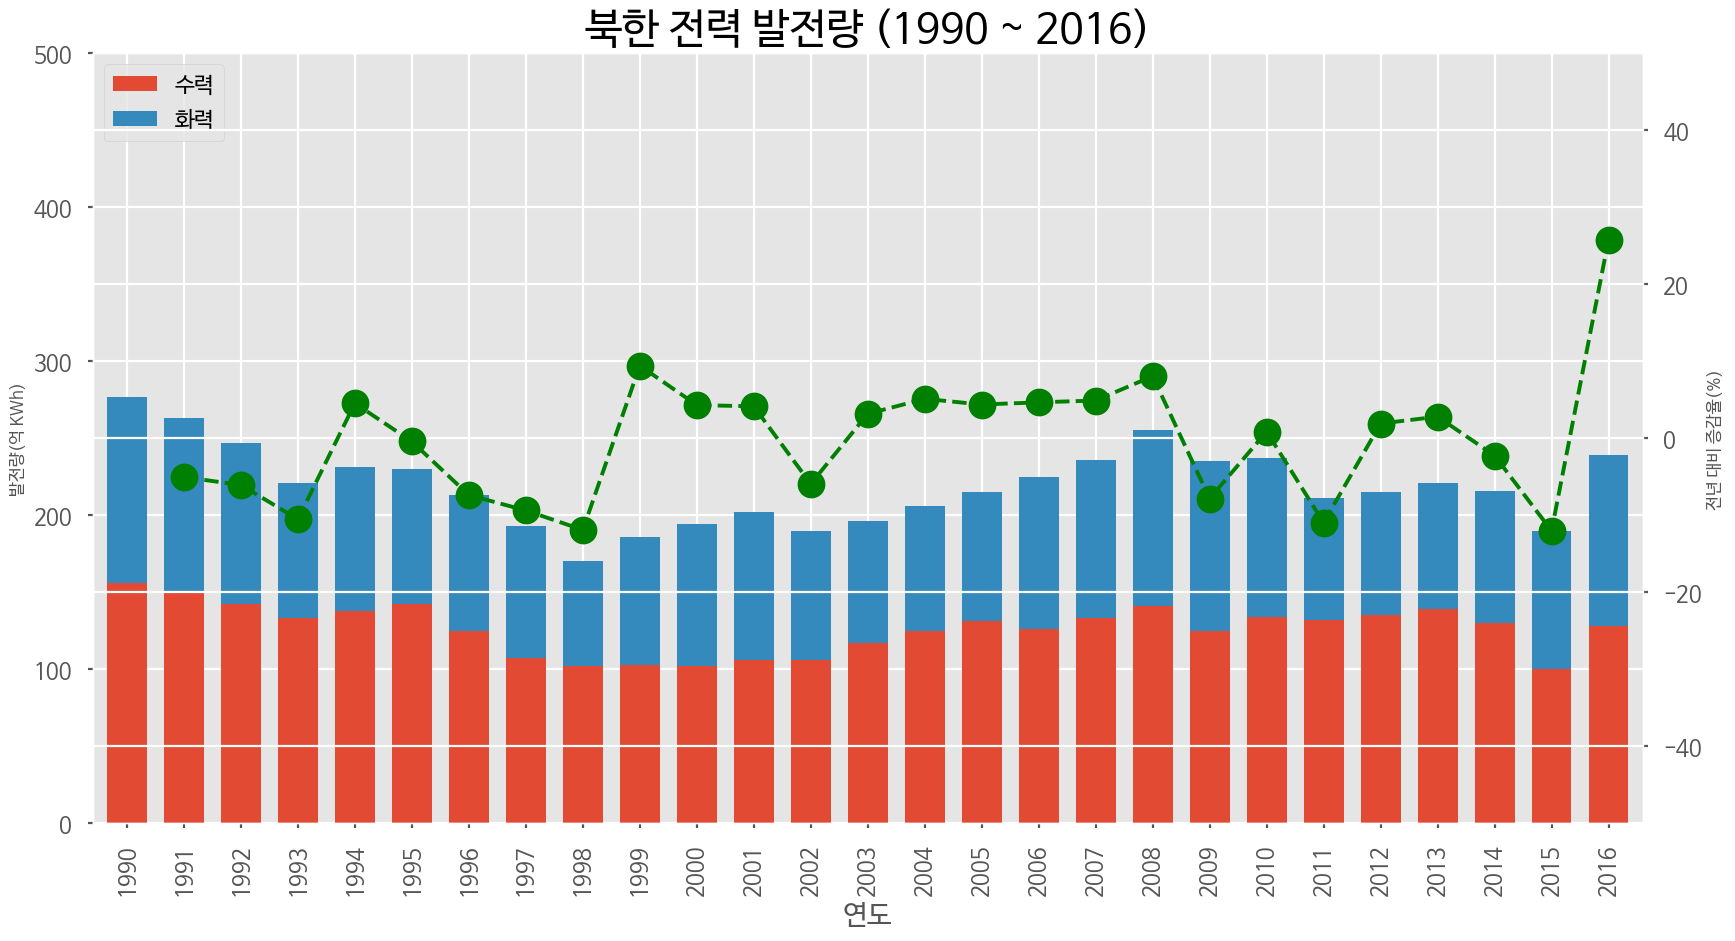

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib 한글 폰트 오류 문제 해결
#from matplotlib import font_manager, rc
#font_path = "./malgun.ttf"   #폰트파일의 위치
#font_name = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

#Excel 데이터를 데이터프레임 변환
df = pd.read_excel(path + '남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

#증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100

#2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,
         color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

plot에 kind = 'bar' 추가로 그리기 가능.  
- color -> 막대별 색상 변화 가능.
- kind = barh -> 가로형 막대 그래프(그냥 bar는 세로형)

## 📌 1-4. 히스토그램

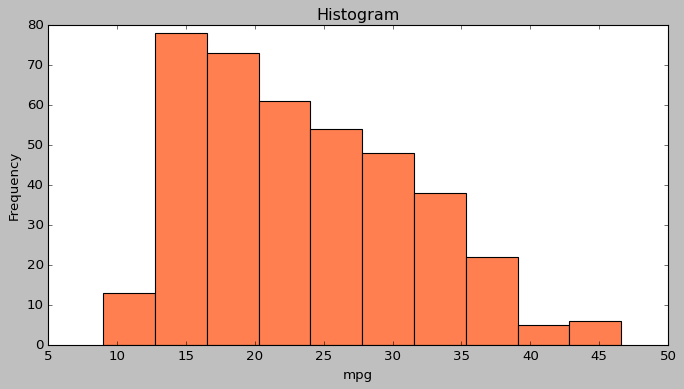

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')  #스타일 서식 지정

#read_csv() 함수로 df 생성
df = pd.read_csv(path+ 'auto-mpg.csv', header = None)

#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

#연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind = 'hist', bins = 10, color = 'coral', figsize = (10, 5))

#그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

plot에 kind = 'hist' 추가로 그리기 가능.  
- bins -> 막대를 몇개(= 구간을 몇개로 할지)에 대한 옵션 지정

## 📌 1-5. 산점도


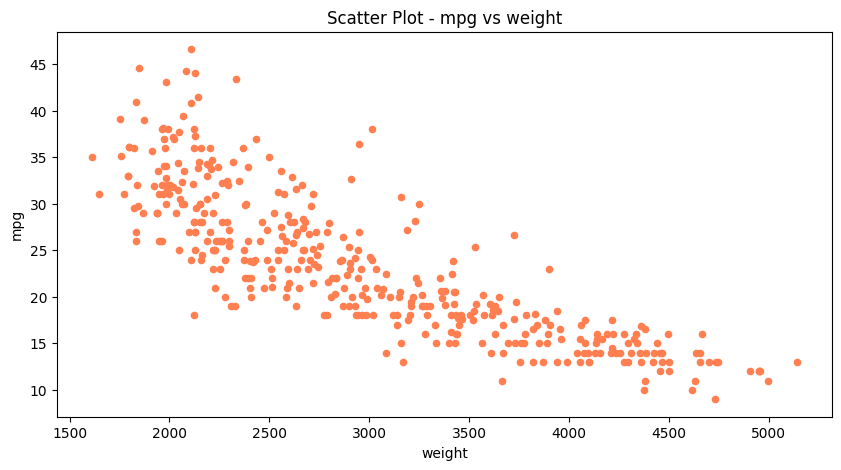

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') #스타일 서식 지정

#read_csv()함수로 df 생성
df = pd.read_csv(path + 'auto-mpg.csv', header = None)

#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

#연비(mpg)와 차중(weight)에 대한 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', color = 'coral', figsize = (10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

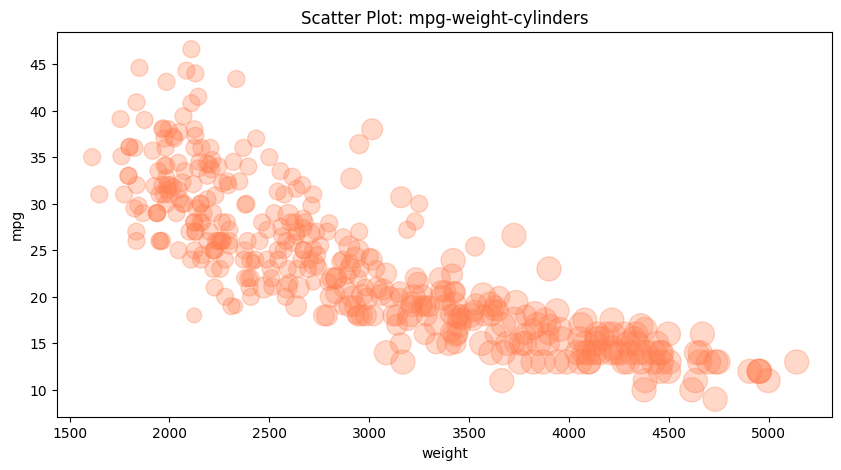

In [ ]:
#cylinders 개수와 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() *300

#3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', color = 'coral', figsize = (10, 5),
        s = cylinders_size, alpha = 0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

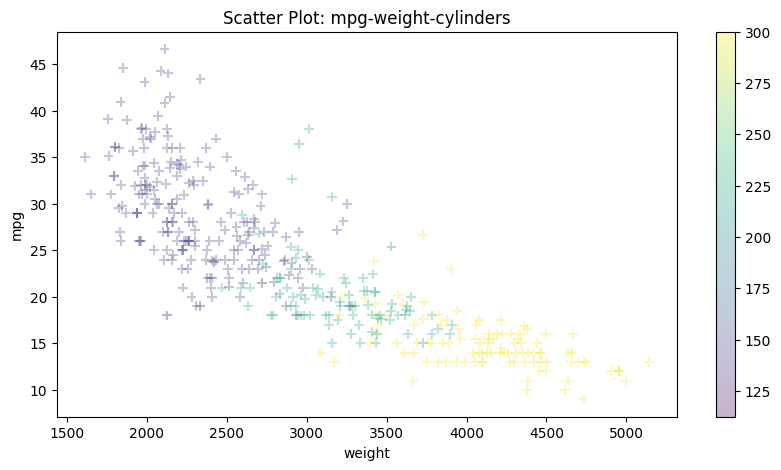

In [ ]:
#cylinders 개수와 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() *300

#3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', marker = '+', figsize = (10, 5),
        cmap = 'viridis', c = cylinders_size, s = 50, alpha = 0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig(path + 'scatter.png')
plt.savefig(path + 'scatter_transparent.png', transparent = True)

plt.show()

plot에 kind = 'scatter' 추가로 그리기 가능.  
- x, y -> 각각 x, y축 변수 지정 필요
- cylinder_size -> 값의 크기에 따라 점의 크기를 다르게 함.

## 📌 1-6. 파이 차트


           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


<ipython-input-45-98df53cfab73>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum() #origin 열을 기준으로 그룹화, 합계 연산


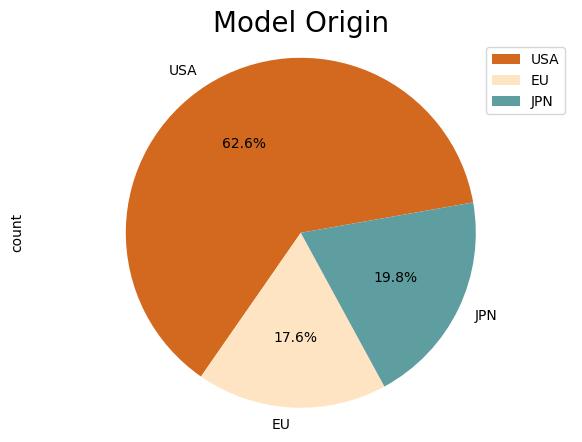

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') #스타일 서식 지정

#read_csv()함수로 df 생성
df = pd.read_csv(path + 'auto-mpg.csv', header = None)

#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

#데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() #origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head()) #그룹 연산 결과 출력

#제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JPN']

#제조국가(origin)  열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind = 'pie',
                        figsize = (7, 5),
                        autopct = '%1.1f%%',   #퍼센트 % 표시
                        startangle = 10,   #파이 조각을 나누는 시작점(각도표시),
                        colors = ['chocolate', 'bisque', 'cadetblue']  #색상 리스트
                        )

plt.title('Model Origin', size = 20)
plt.axis('equal')  #파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels = df_origin.index, loc = 'upper right')  #범례표시
plt.show()

plot에 kind = 'pie' 추가로 그리기 가능.  


## 📌 1-7. 박스 플롯

<ipython-input-51-1d55ba3b58c7>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') #스타일 서식 지정


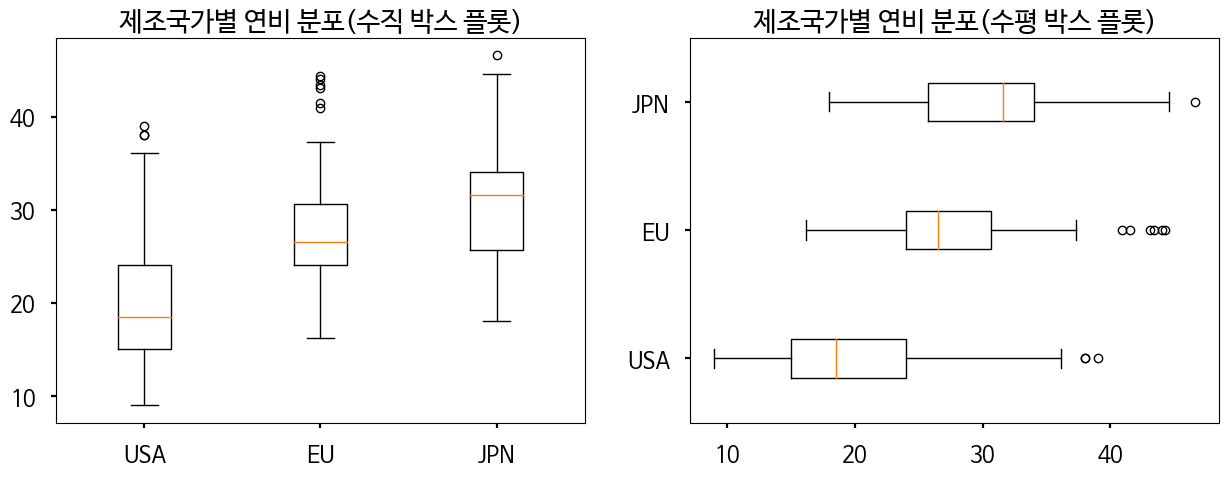

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#오류난다길래 주석 처리
##matplotlib 한글 폰트 오류 문제 해결
#from matplotlib import font_manager, rc
#font_path = path + 'malgun.ttf' #폰트 파일 위치
#font_name = font_manager.FontProperties(fname = font_path).get_name()
#rc('font', family = font_name)

plt.style.use('seaborn-poster') #스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False

#read_csv()함수로 df 생성
df = pd.read_csv(path + 'auto-mpg.csv', header = None)

#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x = [df[df['origin']==1]['mpg'],
                 df[df['origin']==2]['mpg'],
                 df[df['origin']==3]['mpg']],
            labels = ['USA', 'EU', 'JPN'] )

ax2.boxplot(x = [df[df['origin']==1]['mpg'],
                 df[df['origin']==2]['mpg'],
                 df[df['origin']==3]['mpg']],
            labels = ['USA', 'EU', 'JPN'],
            vert = False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

boxplot()
- vert = False -> 수평 박스 플롯. 지정안하면 수직!